# 支持向量机课后练习(参考吴恩达老师及黄海广博士而来)

# 练习1：数据分布为线性决策边界

In [28]:
import scipy.io as sio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [29]:
row_data = sio.loadmat('data/ex6data1.mat')
row_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

##### 我们先看一下练习1的数据集长什么样子

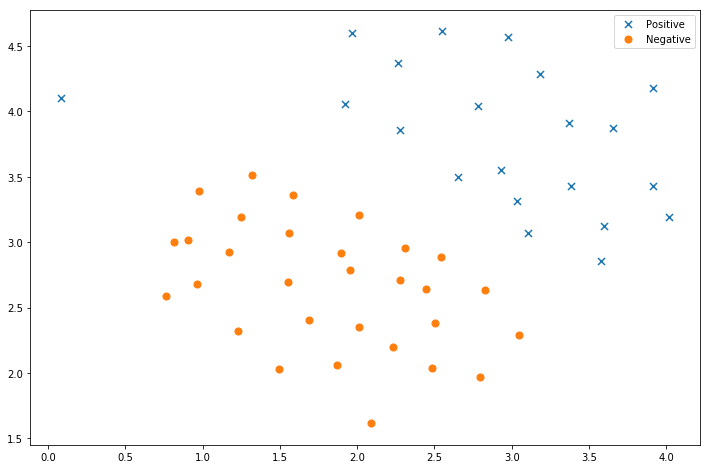

In [30]:
data = pd.DataFrame(row_data['X'], columns=['X1', 'X2'])
data['y'] = row_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))

ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')

ax.legend()
plt.show()

##### 在样本外部有一个噪点，但整体还是线性分离的。所以采用线性支持向量机，来学习决策边界。直接采用scikit-learn中成熟的SVM模块。

In [31]:
from sklearn import svm
model1 = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)
model1

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

##### 首先看下用C=1初始化的模型效果

In [32]:
model1.fit(data[['X1', 'X2']], data['y'])
model1.score(data[['X1', 'X2']], data['y'])

0.9803921568627451

##### 看看增大C值的模型效果

In [33]:
model2 = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)
model2.fit(data[['X1', 'X2']], data['y'])
model2.score(data[['X1', 'X2']], data['y'])

0.9411764705882353

##### 我们用每个样本与决策边界的置信水平，配合颜色映射画图。即样本离决策边界距离越远，则置信度越高，对应的颜色越深。

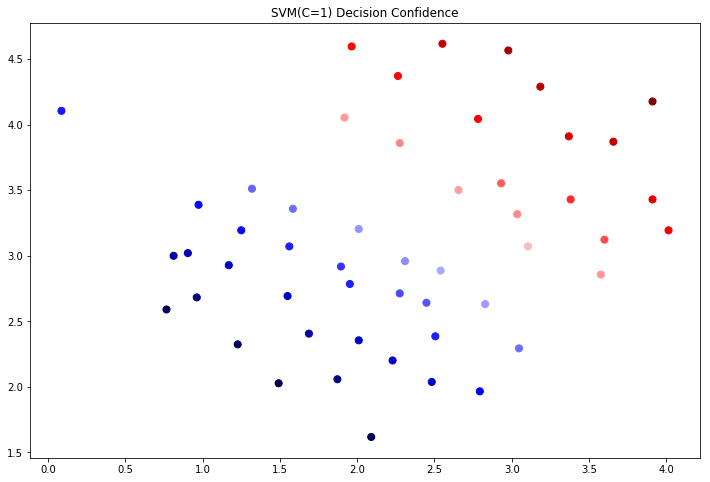

In [35]:
data['model1 Confidence'] = model1.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['model1 Confidence'], cmap='seismic')    # cmap: Reds binary seismic
ax.set_title('SVM(C=1) Decision Confidence')
plt.show()

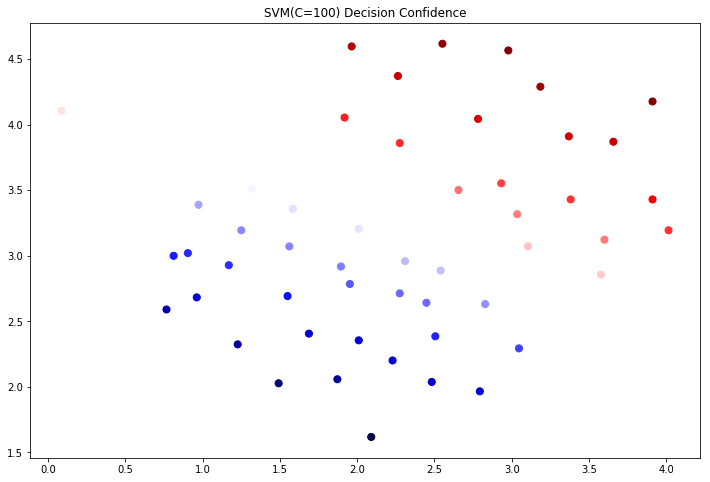

In [36]:
data['model2 Confidence'] = model2.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['model2 Confidence'], cmap='seismic')
ax.set_title('SVM(C=100) Decision Confidence')
plt.show()

##### 可以看出C=1时的决策边界更具泛化能力。C=100时的决策边界被噪点拉偏，不符合支持向量机最大距离的思想，不是一个好的决策边界。

# 练习2：数据分布为非线性决策边界

In [38]:
import scipy.io as sio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns

##### 我们先看一下训练2的数据集长什么样

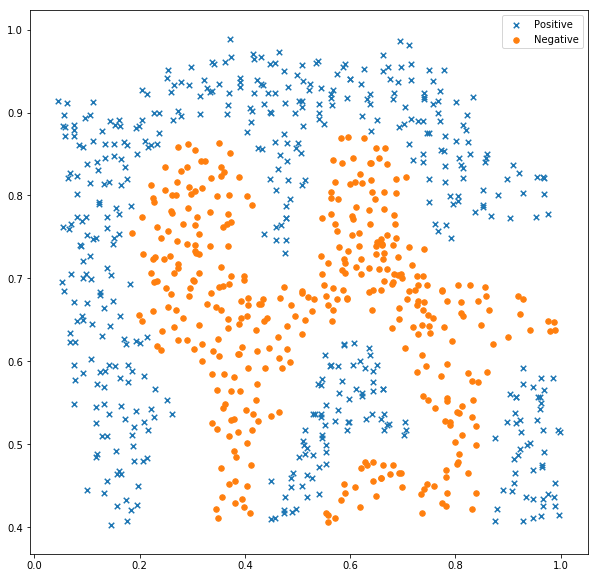

In [42]:
origin_data = sio.loadmat('data/ex6data2.mat')
data = pd.DataFrame(origin_data['X'], columns=['X1', 'X2'])
data['y'] = origin_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(positive['X1'], positive['X2'], s=30, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=30, marker='o', label='Negative')

plt.legend()
plt.show()

##### 看看C=1时，模型效果

In [43]:
model1 = svm.SVC(C=1, gamma=10, kernel='rbf', probability=True)    # probability 是否启用概率估计
model1.fit(data[['X1', 'X2']], data['y'])
model1.score(data[['X1', 'X2']], data['y'])

0.884125144843569

##### the "predict_proba" will give you ndarray (data size, class)
##### so if you just want to plot the decision contour of this binary example, choose one class and plot it

In [48]:
predict_prob1 = model1.predict_proba(data[['X1', 'X2']])
predict_prob1    # 返回每个样本为某个标签的概率，对于此案例的二分类，则每行为该行样本为分别为两种标签的概率，每行的和肯定是1.

array([[4.50736044e-06, 9.99995493e-01],
       [3.60638408e-06, 9.99996394e-01],
       [2.98522078e-03, 9.97014779e-01],
       ...,
       [6.99492166e-03, 9.93005078e-01],
       [3.01121353e-03, 9.96988786e-01],
       [1.15641093e-05, 9.99988436e-01]])

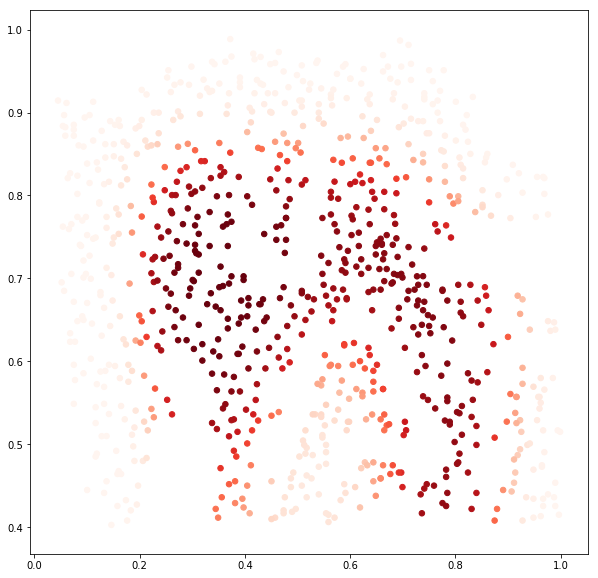

In [49]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(data['X1'], data['X2'], s=30, c=predict_prob1[:,0], cmap='Reds')
plt.show()

##### 再看看C=100时，模型效果

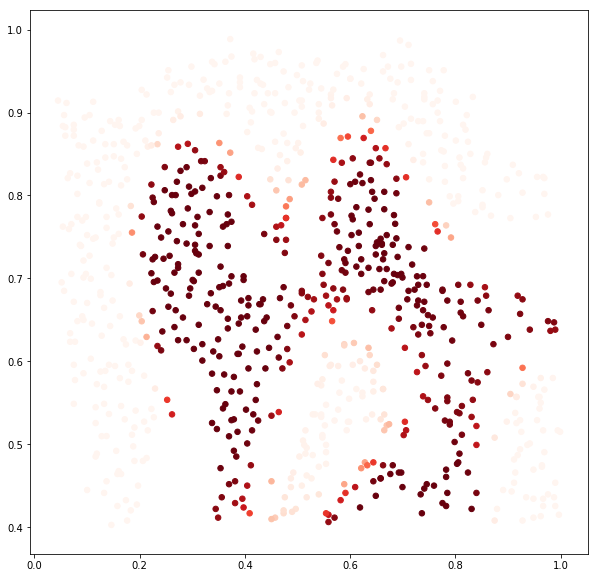

In [50]:
model2 = svm.SVC(C=100, gamma=10, kernel='rbf', probability=True)
model2.fit(data[['X1', 'X2']], data['y'])
predict_prob2 = model2.predict_proba(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(data['X1'], data['X2'], s=30, c=predict_prob2[:, 0], cmap='Reds')
plt.show()

##### 可以看出，在训练集上，C=100表现的更好，是否过拟合还得进一步探索。

# 练习3：寻找最优参数

##### 在练习3中，给我们提供了训练集以及验证集。我们可以根据在训练集上训练好的模型在验证集上的表现，选出最优的超参数。

In [59]:
from sklearn import svm
from sklearn.grid_search import GridSearchCV    # 该模块为网格搜索，自动帮我们寻找最优的参数
from sklearn import metrics
import numpy as np
import pandas as pd
import scipy.io as sio

In [60]:
origin_data = sio.loadmat('data/ex6data3.mat')
print(origin_data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])


In [61]:
X = origin_data['X']
y = origin_data['y'].ravel()
Xval = origin_data['Xval']
yval = origin_data['yval'].ravel()

### 我们先来试试手动网格搜索，看看找到的最佳超参数及表现

In [62]:
condidate = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
combination = [(C, gamma) for C in condidate for gamma in condidate]

In [63]:
search = []
for C, gamma in combination:
    model = svm.SVC(C=C, gamma=gamma)
    model.fit(X, y)                           # 用训练集进行模型训练
    search.append(model.score(Xval, yval))    # 将验证集上的每个样本得分添加

In [65]:
best_score = search[np.argmax(search)]        # 用最高得分的下标索引出最高得分
best_param = combination[np.argmax(search)]   # 用最高得分下标索引出最佳超参数
print(best_param, best_score)

(0.3, 100) 0.965


##### 用手动网格搜索找到的参数看看在验证集上的的整体表现

In [66]:
best_model = svm.SVC(C=0.3, gamma=100)
best_model.fit(X, y)
y_pred = best_model.predict(Xval)

print(metrics.classification_report(yval, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.96      0.97       113
          1       0.95      0.97      0.96        87

avg / total       0.97      0.96      0.97       200



### 接下来我们试试网格搜索，看看找到的最佳超参数及表现

In [67]:
condidate = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
parameters = {'C':condidate, 'gamma':condidate}

model = svm.SVC()
clf = GridSearchCV(model, parameters, n_jobs=-1)
clf.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100], 'gamma': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [68]:
print(clf.best_params_, clf.best_score_)

{'C': 10, 'gamma': 30} 0.9004739336492891


In [69]:
y_pred = clf.predict(Xval)
print(metrics.classification_report(yval, y_pred))

             precision    recall  f1-score   support

          0       0.95      0.96      0.96       113
          1       0.95      0.93      0.94        87

avg / total       0.95      0.95      0.95       200



### They are not the same result. Why?  
##### &nbsp;&nbsp;&nbsp;&nbsp; The reason is that the built in sklearn grid search is trying to find the best candidate from training set.
##### &nbsp;&nbsp;&nbsp;&nbsp; However, when we were doing manual grid search, we train using training set, but we pick the best from cross validation set. This is the reason of difference.
### However, I was wrong. That's not the reason!
##### &nbsp;&nbsp;&nbsp;&nbsp; It turns out that GridSearch will appropriate part of data as CV and use it to find the best candidate.
##### &nbsp;&nbsp;&nbsp;&nbsp; So the reason for different result is just that GridSearch here is just using part of training data to train because it need part of data as cv set

# 练习4：垃圾邮件分类

##### 该练习提供的数据为样本数量为4000个，特征为1899个的训练集，即X.shape=(4000, 1899), y.shape=(4000, )

##### 分类过程与前面几个练习一模一样，可自行完成。
##### 在实际工作中，真正困扰我们的往往是如何创造那些特征，因为数据往往决定了结果的上限，模型的调优等等只是想办法无限逼近这个上限的过程。

# 在下一个课后练习中，我们将使用K-Means和主成分分析进行聚类和图像压缩。